<a href="https://colab.research.google.com/github/jakubsuchansky/Suchansky/blob/main/Funkce_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Funkce - [pyladies](https://naucse.python.cz/2020/pyladies-hradec-leden/beginners/def/)

*args a **kwargs v Pythonu umožňují funkci přijímat libovolný počet pozičních a klíčových argumentů. *args shromažďuje všechny nepojmenované (poziční) argumenty do n-tice (tuple), zatímco **kwargs sbírá pojmenované (klíčové) argumenty do slovníku. To umožňuje větší flexibilitu při definování a volání funkcí, které nepotřebují mít předem daný počet argumentů.

### *args (poziční argumenty)

Zachytí libovolný počet pozičních argumentů, které nejsou explicitně definovány v seznamu parametrů funkce.
Předá tyto argumenty jako n-tici (tuple), na kterou lze přistupovat pomocí indexů.

### **kwargs (klíčové argumenty)
Zachytí všechny nepředané klíčové argumenty do slovníku, kde klíče jsou názvy argumentů a hodnoty jsou jejich přiřazené hodnoty.

Využití - flexibilní funkce s volitelným množstvím parametrů, [dekorátory funkce](https://www.itnetwork.cz/python/oop/dekoratory-v-pythonu).

S pomocí generativního AI chatbotu ([Claude](https://claude.ai/new)), [GitHub Copilot](https://github.com/copilot), ChatGPT, [Gemini](https://gemini.google.com/app) ) vylepši.

In [12]:
# Průměr libovolného počtu čísel
def prumer(*cisla):
    return sum(cisla) / len(cisla) if len(cisla) !=0 else None

prumer(10,30,20)

20.0

Vyzkoušejte různé typy volání funkce

In [ ]:
def vypis(text, *text2, opakovani=1):
    for _ in range(opakovani):
        print(text, end = ", ")
        print(*text2)
vypis("abc","aba")
vypis("aaa","bbb","cccc","ddd",3)
vypis("a")
vypis("aa","bb","cc")

abc, aba
aaa, bbb cccc ddd 3
a, 


Vysvětli kód

In [ ]:
def vypis(text:str, *text2:str, opakovani=1): # delame funkci nazvanou vypis, "davame na jevo" uzivately ze text a text 2 by meli byt strinly
    for _ in range(opakovani): # for loop kde _ bude nabyvat hodnota ve vzdalenosti opakovani
        print(text, end = ", ") # vypise text,
        index = _%len(text2) #  vezme zbytek z toho kdyz vydelime _%delku textu2
        print(text2[index])  # vypíše položku text2


In [ ]:
def vypis_info(**kwargs):
  for klic, hodnota in kwargs.items():
    print(f"{klic}: {hodnota}")

vypis_info(jmeno="Petr", vek=30, mesto="Praha")

jmeno: Petr
vek: 30
mesto: Praha


Pořadí musí být:
poziční → *args → pojmenované → **kwargs

Vykoušejte různé způsoby volání funkcí

In [ ]:
def mix(a, b, *args, c=0, **kwargs):
    print("a =", a)
    print("b =", b)
    print("args =", args)
    print("c =", c)
    print("kwargs =", kwargs)

mix(1, 2, 3, 4, 5, c=10, x=100, y=200)

a = 1
b = 2
args = (3, 4, 5)
c = 10
kwargs = {'x': 100, 'y': 200}


### Chybová hlášení
Ošetřete dělení nulou nějakým jiným způsobem.

In [ ]:
def deleni(a:float, b:float):
    if b == 0:
        raise ValueError("Nulou nelze dělit!")
    
    return a / b
deleni(10,0)
    

5.0

Typové hinty, isinstance
Když Python narazí na raise, okamžitě zastaví program a ukáže chybovou hlášku.

Nejčastější chybové hlášky:
raise TypeError("Očekávám číslo, ale dostal jsem text.")
raise ValueError("Číslo musí být kladné.")
raise IndexError("Index je mimo rozsah seznamu.")
raise RuntimeError("Došlo k neočekávané chybě.")

In [ ]:
def obsah(a: int, b: int) -> float:
    return a*b
S = obsah(2,"3")
print(S)

33


In [ ]:
def obsah(a: int, b: int) -> int:
    if not (isinstance(a, int) and isinstance(b,int)) :
        raise TypeError("Argumenty 'a, b' musí být typu int.")
    return a*b
S = obsah(2,"3")
print(S)

### Generování náhodných čísel

In [ ]:
import random

print(random.randint(1, 10))     # celé číslo 1–10
print(random.random())           # číslo 0–1
print(random.uniform(5, 15))     # desetinné číslo 5–15

6
0.9756005225222604
14.2713445442829


Vylepšete funkci  nahodny_prumer (docstring, typové hinty, *args, klíčové parametry)

Průměr: 46.50


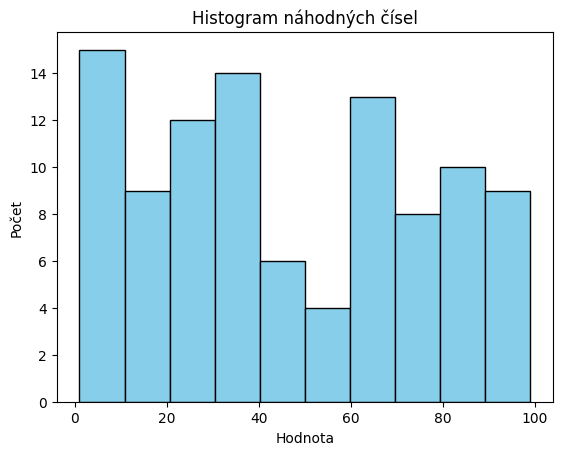

In [6]:
import random
import matplotlib.pyplot as plt
from typing import Optional

def nahodny_prumer(n: int, min_hodnota: int = 1, max_hodnota: int = 100, *args: int) -> float:
    """
    Vygeneruje náhodná čísla a vrátí jejich průměr.

    Parametry:
    n (int): Počet náhodných čísel.
    min_hodnota (int, volitelně): Minimální hodnota generovaných čísel (default 1).
    max_hodnota (int, volitelně): Maximální hodnota generovaných čísel (default 100).
    *args (int): Volitelná dodatečná čísla, která se započítají do průměru.

    Návratová hodnota:
    float: Průměrná hodnota všech čísel.
    """
    if n < 0:
        raise ValueError("Počet čísel n musí být nezáporný.")
    if min_hodnota > max_hodnota:
        raise ValueError("min_hodnota nesmí být větší než max_hodnota.")

    cisla = [random.randint(min_hodnota, max_hodnota) for _ in range(n)]
    cisla.extend(args)

    if not cisla:
        return 0.0

    return sum(cisla) / len(cisla), cisla  # Vracíme i seznam čísel pro histogram

# Generování čísel a průměru
prumer, cisla = nahodny_prumer(100, 1, 100)

print(f"Průměr: {prumer:.2f}")

# Vykreslení histogramu
plt.hist(cisla, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram náhodných čísel")
plt.xlabel("Hodnota")
plt.ylabel("Počet")
plt.show()


Vygenerujte náhodná čísla a zobrazte jejich histogram = sloupcový graf, který ukazuje, kolikrát se něco vyskytuje.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# vygeneruje 200 náhodných čísel od 0 do 9
data = np.random.randint(0, 10, 200)

plt.hist(data)
plt.xlabel("Hodnota")
plt.ylabel("Počet výskytů")
plt.title("Histogram náhodných čísel")

plt.show()

ModuleNotFoundError: No module named 'numpy'